<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from scipy import special
import warnings
warnings.filterwarnings('ignore')

# Homework 10 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

### Preliminary: Distributions ###
The code below will help you in some of the exercises. Please refer to it as needed.

**Discrete Distribution Table Defined by a Probability Function**

`Table().values(values_array).probability_function(name_of_function)` evaluates to the distribution table of a discrete random variable $X$ such that:

- `values_array` is an array consisting of the possible values of $X$
- `name_of_function` is the name of a function that takes $x$ as its argument and returns $P(X =x)$

**Beta Density**

For an array `x` of values in the unit interval, `stats.beta.pdf(x, r, s)` evaluates to the array f(`x`) where $f$ is the beta (`r`, `s`) density.

**Simulated Exponential Random Variables**

`stats.expon.rvs(scale = 1/lam, size=n)` evaluates to an array consisting of observed values of i.i.d. exponential (`lam`) random variables $X_1, X_2, \ldots, X_n$.

**Simulated Gamma Random Variables**

`stats.gamma.rvs(r, scale = 1/lam, size=n)` evaluates to an array consisting of observed values of i.i.d. gamma (`r`, `lam`) random variables $X_1, X_2, \ldots, X_n$.

### Preliminary: Line Plots ###
In Data 8 you used `Table.plot` to draw line plots, but in this class the line plots have typically been drawn using the `plot` function of `matplotlib`. Here is the syntax; you are going to need it in the exercises. It's easier than setting up tables first, especially when you want to overlay multiple plots.

The `pyplot` module of `matplotlib` has been imported for you as `plt`. This is its standard abbreviation.

Let `x` and `y` be two numerical arrays of the same length. Then `plt.plot(x, y)` produces a line plot with values of `x` on the horizontal axis and the corresponding values of `y` on the vertical. The plot "joins the dots" (`x.item(0)`, `y.item(0)`), (`x.item(1)`, `y.item(1)`), (`x.item(2)`, `y.item(2)`), and so on.

The optional argument `lw=n` can be used to set a line width of `n` units. Just use `lw=2` in this homework.

The semicolon at the end of the last line of code in each cell stops `matplotlib` from blurting out text that we don't need here.

Run these cells to see some examples. Note the overlaid plots: they are straightforward to draw, and Python chooses a different color for each plot. 

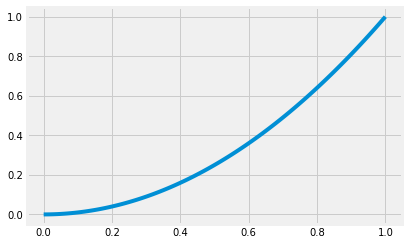

In [2]:
x = np.arange(0, 1.01, 0.01)
x_squared = x ** 2
plt.plot(x, x_squared);

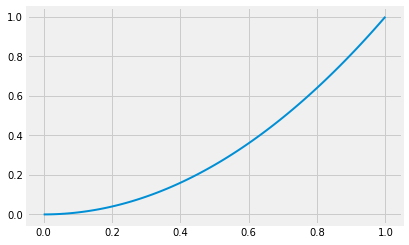

In [3]:
plt.plot(x, x_squared, lw=2);

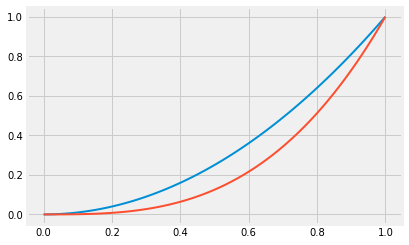

In [4]:
x_cubed = x ** 3
plt.plot(x, x_squared, lw=2)
plt.plot(x, x_cubed, lw=2);

You can get more fancy with labels and legends, but you don't have to do that in this homework.

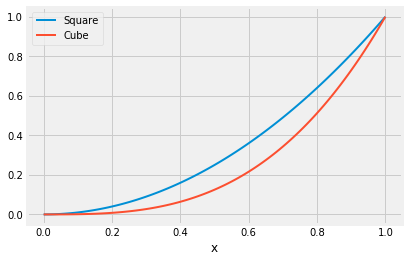

In [5]:
x_cubed = x ** 3
plt.plot(x, x_squared, lw=2, label = 'Square')
plt.plot(x, x_cubed, lw=2, label = 'Cube')
plt.legend()
plt.xlabel('x');

This is only a tiny fraction of what you can do with `matplotlib`. For more, here is a great [tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html) by [Nicolas Rougier](https://www.labri.fr/perso/nrougier/).

### 1.  Heads in Tosses of a Random Coin ###
Let $X$ be a random proportion with a prior distribution that is beta $(2, 3)$. Given $X = p$, let $N$ be the number of heads in 5 tosses of a $p$-coin.

**a)** Plot the prior density of $X$.

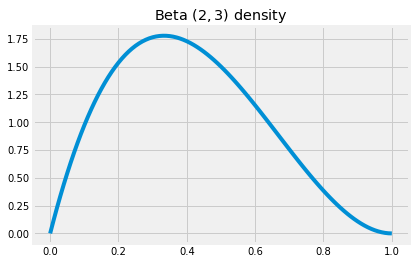

In [6]:
# Your answer to 1a

x = np.arange(0, 1.01, 0.01)

plt.plot(x , stats.beta.pdf(x, 2, 3))

plt.title('Beta $(2, 3)$ density');

**b)** For each $n = 0, 1, 2, 3, 4, 5$, plot the posterior density of $X$ given $N=n$. All six plots should be on the same graph. 

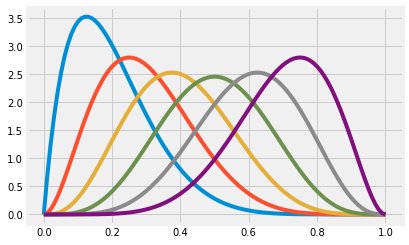

In [7]:
# Your answer to 1b
x = np.arange(0, 1.01, 0.01)
#posterior density is beta(2+n, 3+5-n)
plt.plot(x, stats.beta.pdf(x, 2, 8))
plt.plot(x, stats.beta.pdf(x, 3, 7))
plt.plot(x, stats.beta.pdf(x, 4, 6))
plt.plot(x, stats.beta.pdf(x, 5, 5))
plt.plot(x, stats.beta.pdf(x, 6, 4))
plt.plot(x, stats.beta.pdf(x, 7, 3))


**c)** For each $n = 0, 1, 2, 3, 4, 5$, find the MAP estimate of the probability of heads given $N=n$, by completing the cell below with an appropriate expression. Here `map_estimates` is an array that contains all the MAP estimates. 

By eye, check that your answers are consistent with the graphs in (b).

In [8]:
# Your answer to 1c

r = 2
s = 3
n = 5
k = np.arange(0, n+1)

map_estimates = (r+k-1)/(r+s+n-2)
    
map_estimates

array([0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 ])

**d)** Complete the cell below to display the probability histogram of $N$. You can use any number of lines of code in the definition. In the blanks in the last line of the cell, enter the name of the distribution and provide the numerical parameters.

If you want to, you can use `special.factorial(j)` to get the factorials of the non-negative integer array `j`. The `special` module of `SciPy` has been imported for you. But you can also write the code without computing factorials.

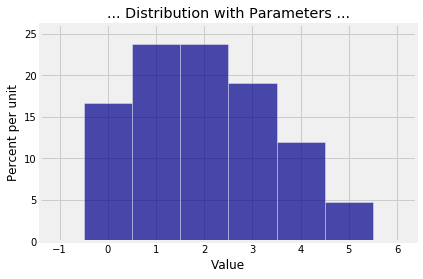

In [9]:
# Your answer to 1d

def probs_N(n):
    beta = stats.beta.pdf(0.5, 2+n, 3+5-n)
    bayestop = stats.binom.pmf(n, 5, 0.5) * stats.beta.pdf(0.5, 2, 3)
    return bayestop / beta

dist = Table().values(np.arange(6)).probability_function(probs_N)
Plot(dist)
plt.title('Beta Binomial Distribution with Parameters r=2, s=3, n=5');

**e)** Find the numerical value of $E(N)$ without using a code cell.

#newpage

### 2. Waiting for a Random Coin to Land Heads ###
Let $X$ be a random proportion. Given $X=p$, let $T$ be the number of tosses till a $p$-coin lands heads.

**a)** Let $P(X = 1/10) = 1/4$, $P(X = 1/7) = 1/4$, and $P(X = 1/3) = 1/2$. Find $E(T)$.

**b)** Find $E(T)$ if $X$ has the beta $(r, s)$ density for some $r > 1$. Simplify all integrals and Gamma functions in your answer.

**c)** Let $X$ have the beta $(r, s)$ density. For fixed $k > 0$, find the posterior density of $X$ given $T = k$. Identify it as one of the famous ones and state its name and parameters.

#newpage

### 3. Discrete and Continuous Random Selections ###
Fix a positive integer $n$, and let $p$ be strictly between 0 and 1.

Suppose Person A picks a number uniformly in the interval $(0, n)$. Let $X$ be the number Person A picks.

Suppose that independently of Person A, Person B picks an integer $Y$ according to the binomial $(n, p)$ distribution, for example by using `stats.binom.rvs(n, p, size=1)` or by tossing a $p$-coin $n$ times and recording the number of heads.

Find $P(X < Y)$.

#newpage

### 4. Maximum Likelihood Estimate of the Exponential Rate ###
For $n > 1$, let $X_1, X_2, \ldots , X_n$ be i.i.d. exponential $(\lambda )$ variables. 

**a)** Let $\hat{\lambda}_n$ be the maximum likelihood estimate (MLE) of the parameter $\lambda$. Find $\hat{\lambda}_n$ in terms of the sample mean $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$. The subscript $n$ in $\bar{X}_n$ is there to remind us that we have the average of $n$ values. It doesn't refer to the $n$th sampled value $X_n$.

**b)** This part is a simulation study in which you already know $\lambda$ and are examining how close your estimate comes to this known value. Take $\lambda = 0.25$. We have assigned it the name `lam` because `lambda` means something else in Python.

Repeat the following simulation 10,000 times.
- Generate a sample of 400 i.i.d. exponential (`lam`) variables. Use `stats.expon.rvs(scale = 1/lam, size=400)`.
- Calculate your MLE $\hat{\lambda}_{400}$ based on this sample.

Then draw the histogram and find the mean of your 10,000 MLEs. 

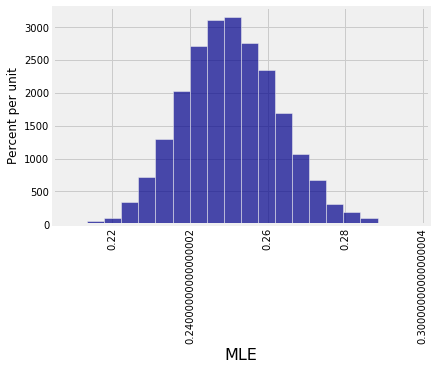

In [13]:
# Your answer to 4b
lam = 0.25

# Define a function that returns the MLE based on 
# one i.i.d. sample of size 400 
# from the exponential distribution with lambda = 0.25
def mle_from_one_sample():
    sample = stats.expon.rvs(scale = 1/lam, size=400)
    return 1 / np.mean(sample)

# Construct an array of 10,000 MLEs
mle_400 = make_array()
for i in range(10000):
    mle_400 = np.append(mle_400, mle_from_one_sample())
    
# Plot a histogram of the 10,000 MLEs
Table().with_column('MLE', mle_400).hist(bins=20)

In [14]:
# The mean of your 10000 mle's
np.mean(mle_400)

0.25049961126408476

**c)** Use facts about sums and linear transformations to find the distribution of $\bar{X}_n$ with little or no calculation. Recognize it as one of the famous ones and provide its name and parameters. Use it to find $E(\hat{\lambda}_n)$.

**d)** Is $\hat{\lambda}_n$ an unbiased estimate of $\lambda$? If it is biased, does it overestimate on average, or does it underestimate? Is it asymptotically unbiased? That is, does $E(\hat{\lambda}_n)$ converge to $\lambda$ as $n \to \infty$?

**e)** Your simulation in **b)** should show an approximately normal distribution for $\hat{\lambda}_n$. The Central Limit Theorem says the distribution of $\bar{X}_n$ should be approximately normal, but is $\hat{\lambda}_n$ a linear function of $\bar{X}_n$? If not, why is its distribution approximately normal?

[This one needs a little thought but no calculation. Think about what a smooth function looks like over a small interval in its domain, and then think about why small intervals are relevant here.]

#newpage

### 5. Maximum Likelihood Estimates of the Gamma Parameters: Part 1 ###
Likelihood functions can be complicated and MLEs can't always be found analytically. This exercise and the next are about an example where the maximization has to be done numerically. 

For $n > 1$ let $X_1, X_2, \ldots, X_n$ be i.i.d., each with the gamma $(r, \lambda)$ distribution. 

**a)** Suppose that we are all-knowing, and suppose we know that the true value of $r$ is 3 and the true value of $\lambda$ is 0.25. Run the cell below to create a sample of size $n = 625$. We are going to give this sample to some data scientists and ask them to use the maximum likelihood method to estimate $r$ and $\lambda$.  

In [39]:
true_r = 3
true_lam = 0.25

n = 625

original_sample = stats.gamma.rvs(true_r, scale=1/true_lam, size=n)
original_tbl = Table().with_column('Original Sample', original_sample)

Run the cell below to see the distribution of the sample.

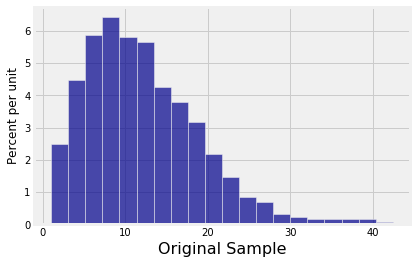

In [40]:
original_tbl.hist(bins=20)

Let $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$. Find $E(\bar{X}_n)$, and in the cell below, find the observed value of $\bar{X}_n$ in the sample created above.

In [41]:
#your solution to 5a
(3/0.25), np.mean(original_sample)

(12.0, 12.131588471483896)

**b)** Write the log likelihood function $L(r, \lambda)$ given an i.i.d. gamma $(r, \lambda)$ sample $X_1, X_2, \ldots, X_n$. For fixed $r$, find the value of $\lambda$ that maximizes this log likelihood function. Your answer should be in terms of $r$ and the sample. Is it consistent with your answer to **4a**?

**c)** Now write the equation that has to be solved to find the maximizing value of $r$. The equation should just involve $r$ and the sample. Don't forget that $\Gamma$ is a function of $r$. And don't even try to solve your equation.

#newpage

### 6. Maximum Likelihood Estimates of the Gamma Parameters: Part 2 ###
This exercise continues the previous one.

**a)** The equation in **5c** doesn't have a closed-form analytical solution. The data scientists are going to have to see if they can maximize the log likelihood function numerically. The answers might be approximations, but good optimization programs work very well with smooth functions. 

Help the data scientists by defining the function `log_likelihood` in the cell below. It takes $r$, $\lambda$ and the data as arguments and should return the log likelihood based on $r$, $\lambda$, and the values of the data.

Helpful code:
- `np.log(x)` for $\log(x)$; `x` can be an array
- `special.gamma(x)` for $\Gamma(x)$ where `x` is a positive number; the `special` module of `SciPy` has been imported for you

You can use `n` in place of 625 as `n = 625` was assigned earlier. 

In [49]:
#your solution to 6a

def log_likelihood(r, lam, data):
    sample_sum = np.sum(data)
    sum_of_logs = np.sum(np.log(data))
    return (n*r*np.log(lam)) - n*np.log(special.gamma(r)) + (r-1)*sum_of_logs - lam*sample_sum

**b)** Most numerical optimization systems include a minimizing function because minimizing distances is a common use. The data scientists are going to use the function `minimize` from the `datascience` library. It is a version of the `minimize` function in the `optimize` module of `SciPy`. 

The argument of `minimize` is the name of the function being minimized. This function must only take numerical arguments (more than one is fine) and return a numercial output. 

`minimize` returns the minimizing argument (or arguments) of the specified function.

The example below shows how to use `minimize` to find the values of $a$ and $b$ that minimize $f(a, b) = a^2 + b^2 + 2$. The math answer is $a = 0$ and $b = 0$.

In [50]:
def f(a, b):
    return a**2 + b**2 + 2

minimize(f)

array([3.16392934e-11, 3.16392934e-11])

Maximizing a function is the same as minimizing the negative of that function. In the cell below, define the function that has to be specified as the argument to `minimize` in order to find the maximum likelihood estimates of $r$ and $\lambda$. Remember that the function should only take $r$ and $\lambda$ as its arguments.

In [51]:
#your solution to 6b

def function_to_minimize(r, lam):
    return -log_likelihood(r, lam, original_sample)

Minimizing complicated functions isn't easy and the default numerical method used by `minimize` doesn't do well with the gamma log likelihood function. But `minimize` takes an optional argument that specifies the numerical method that should be used for optimization. We have specified the option `method = 'Nelder-Mead'` when you use `minimize` below. This specifies a simplex algorithm and works just fine. You don't have to worry about this detail but you're welcome to look up simplex algorithms if you are interested.

Run the cell below. If you have defined your functions correctly above, you are likely to see pretty good estimates of the true values of $r$ and $\lambda$ specified at the start of the exercise.

In [52]:
minimize(function_to_minimize, method = 'Nelder-Mead')

array([2.97169726, 0.24495615])

These are the data scientists' estimates $\hat{r}$ and $\hat{\lambda}$ based on their sample. 

**c)** No data scientist is just going to present one number as the estimate of a parameter and say that's the end of the story. They are going to construct a confidence interval for the parameter. Help the data scientists by constructing an approximate 95% confidence interval for $r$ using maximum likeihood estimates based on 2500 bootstrap replications of their sample.

Helpful code, with more details in the [Data 8 reference sheet](http://data8.org/sp18/python-reference.html):
- tbl.sample(...) samples uniformly at random (with replacement, by default) from the rows of a table
- np.random.choice(...) samples uniformly at random (with replacement, by default) from an array

Here's a blank cell for your code. All the necessary pieces are in the cells above. You have to figure out the sequence and put it together. You should expect the code to take a little while to run because of all the bootstrapping and minimizing.

In [53]:
#your solution to 6c

# Define a function that bootstraps the sample and 
# returns the MLE based on the bootstrapped sample
def one_bootstrap_MLE():
    bootstrap_sample = np.random.choice(original_sample, 625)
    def f(r, lam):
        return -log_likelihood(r, lam, bootstrap_sample)
    return minimize(f, method = 'Nelder-Mead')

# Construct an array of 2500 bootstrap MLEs
r_mles = make_array()
for i in range(2500):
    r_mles = np.append(r_mles, one_bootstrap_MLE()[0])

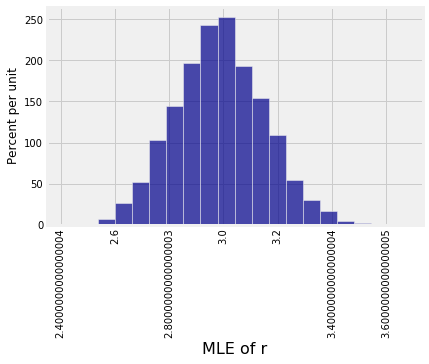

In [54]:
Table().with_column('MLE of r', r_mles).hist(bins=20)

**d)** Construct the confidence interval in the cell below. Helpful code:

- `percentile(45, x)` evaluates to the 45th percentile of the array `x`

In [55]:
#your solution to 6d

left_end = percentile(2.5, r_mles)
right_end = percentile(97.5, r_mles)

good = left_end < true_r and right_end > true_r

[left_end, right_end], good

([2.6700333551111095, 3.3202184354471025], True)

**e)** There are 219 students enrolled in Prob 140. Write an expression that evaluates to the expected number of students who are expected to get `True` in the answer above. 

In [56]:
# your answer to 6e

219*0.95

208.04999999999998

You've helped the data scientists a lot. You are done with your homework. If the data scientists also want a confidence interval for $\lambda$, they are going to have to get it themselves.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* **Save your notebook using File > Save and Checkpoint.**
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.  

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Homework 10 on Gradescope.
* **Make sure to assign each page of your pdf to the correct question.**


### **We will not grade assignments which do not have pages selected for each question or were submitted after the deadline.** 

In [ ]:
import gsExport
gsExport.generateSubmission("Homework_10.ipynb")